# Load and preprocess images
- Shows how to load and preprocess an image dataset
- Full tutorial reference: https://www.tensorflow.org/tutorials/load_data/images

### Import TensorFlow and necessary libraries

In [22]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import tensorflow as tf

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.9.1


In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file(
    origin=dataset_url,
    fname='flower_photos',
    untar=True
)
dataset_dir = pathlib.Path(dataset_dir)

228813984/228813984 [==============================] - 26s 0us/step


In [10]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))
print(image_count)

3670


### The flowers dataset
- It contains five sub-directories:
    - flowers_photos/
      - daisy/
      - dandelion/
      - roses/
      - sunflowers/
      - tulips/

### Load data using a Keras utility
- It is a convenient way to create a ```tf.data.Dataset``` from a directory of images.

In [11]:
batch_size = 32
img_width = 180
img_height = 180

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


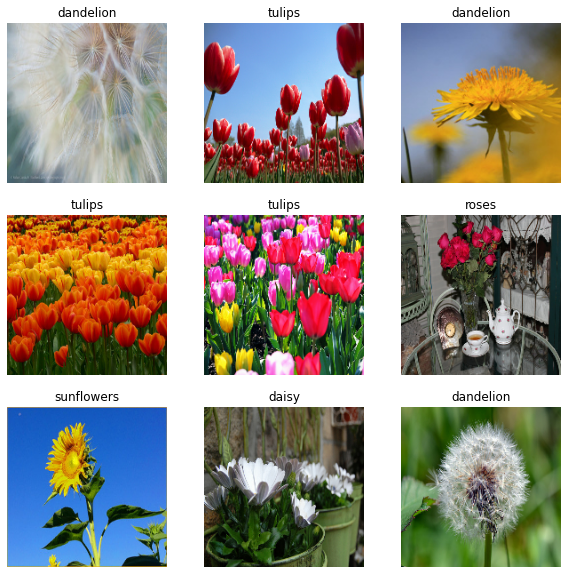

In [30]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.show()

### Configure the dataset
- Make sure to use buffered prefetching in order to yield data from disk without having I/O become blocking.
    - ```Dataset.cache``` keeps the images in memory after they are loaded off disk during the first epoch. This will ensure the dataset does not become bottleneck while training the model.
    - ```Dataset.prefetch``` overlaps data preprocessing and model execution while training. 

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train a model

In [32]:
num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [34]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
92/92 [==============================] - 51s 549ms/step - loss: 1.3002 - accuracy: 0.4499 - val_loss: 1.1034 - val_accuracy: 0.5708
Epoch 2/5
92/92 [==============================] - 52s 562ms/step - loss: 0.9851 - accuracy: 0.6151 - val_loss: 0.9805 - val_accuracy: 0.6185
Epoch 3/5
92/92 [==============================] - 60s 654ms/step - loss: 0.8011 - accuracy: 0.6969 - val_loss: 0.9476 - val_accuracy: 0.6362
Epoch 4/5
92/92 [==============================] - 53s 572ms/step - loss: 0.6270 - accuracy: 0.7619 - val_loss: 0.9870 - val_accuracy: 0.6444
Epoch 5/5
92/92 [==============================] - 58s 630ms/step - loss: 0.4208 - accuracy: 0.8532 - val_loss: 1.1849 - val_accuracy: 0.6526


### Conclusion
- This tutorial showed how to load and preprocess image dataset using Keras preprocessing layers and utilities. However, the model is overfitting (the validation accuracy is strictly less than the train accuracy) and needs to improve by applying techniques including [data argumentation](./tensorflow_keras_data_argumentation.ipynb), [regularization and dropout](./tensorflow_keras_overfit_and_underfit.ipynb).